# Titanic - Machine Learning from Disaster### Zachary Gager

Kaggle's [introductory competition to machine learning](https://www.kaggle.com/competitions/titanic/overview).  The goal of this analysis is to predict passenger survival based on features such as age, sex, and passenger class. 


### Suggested Structure for a Data Science Notebook

1. **Title and Introduction**
   - **Title**: Clear and descriptive title of the project.
   - **Introduction**: Brief overview of the problem, objectives, and dataset. Explain why the problem is important and what you aim to achieve with your analysis.

2. **Data Loading and Initial Exploration**
   - **Data Loading**: Load the dataset and provide basic information about it (e.g., number of rows and columns, data types).
   - **Initial Exploration**: Show some basic statistics and the first few rows of the dataset. This gives a quick snapshot of what the data looks like.

3. **Data Cleaning**
   - **Missing Values**: Identify and handle missing values. Explain the rationale behind your approach (e.g., imputation, removal).
   - **Data Types**: Ensure that data types are appropriate for analysis (e.g., converting categorical data to numerical).
   - **Outliers**: Detect and handle outliers if necessary.

4. **Data Visualization and Exploratory Data Analysis (EDA)**
   - **Univariate Analysis**: Visualize the distribution of individual variables using histograms, bar plots, etc.
   - **Bivariate and Multivariate Analysis**: Explore relationships between variables using scatter plots, correlation matrices, pair plots, etc.
   - **Target Variable Analysis**: Specifically analyze the target variable (e.g., survival rates in the Titanic dataset) and its relationship with other features.

5. **Feature Engineering**
   - **Creating New Features**: Introduce new features derived from existing ones (e.g., family size, title extraction from names).
   - **Encoding Categorical Variables**: Convert categorical variables into numerical values (e.g., one-hot encoding).
   - **Feature Selection**: Explain and perform feature selection, if applicable.

6. **Model Preparation**
   - **Data Splitting**: Split the data into training and testing sets. Explain the rationale behind the chosen method (e.g., train-test split, cross-validation).
   - **Scaling and Normalization**: Apply scaling or normalization if necessary.

7. **Modeling**
   - **Baseline Model**: Build and evaluate a simple baseline model. This sets a benchmark for future improvements.
   - **Advanced Models**: Build and evaluate more complex models. Include hyperparameter tuning and cross-validation.
   - **Model Comparison**: Compare the performance of different models using appropriate metrics (e.g., accuracy, precision, recall, F1 score).

8. **Model Evaluation**
   - **Final Model Evaluation**: Evaluate the final chosen model on the test set. Discuss the results and any observations.
   - **Error Analysis**: Perform error analysis to understand where the model is making mistakes and why.

9. **Conclusion**
   - **Summary of Findings**: Summarize the key findings from your analysis and modeling.
   - **Future Work**: Suggest possible improvements and future work.

10. **Appendix**
   - **Code for Reproducibility**: Include any additional code necessary to reproduce the results.
   - **References**: Cite any righlights your ability to handle real-world data science tasks from start to finish.

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
import warnings

## 1. Data Loading and Initial Exploration

First we load the data, explore the format of the data, create new features by parsing, explore any missing data (both in what was provided and what we created as new features), and look for duplicated values. 

### 1a. Load Data

In [2]:
# Load in the data provided by Kaggle
original_df = pd.read_csv('train.csv')
analyze_df = original_df.copy()
print('Number of rows: ' + str(len(analyze_df)))
analyze_df.head(10)

Number of rows: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 1b. Explore Values of `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`, and `Age`

First I want to get a better idea of the data by looking at the types of fields we have available. 

- Pclass, Sex, SibSp, Parch, and Embarked should just be categorical variables.
- Kaggle said Age should be in the format xx.5 if it was estimated or a decimal if it is less than 1

In [3]:
# Values for categorical variables (disregarding NaN for now)
for variable in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    unique_values = list(analyze_df[variable].dropna().unique())
    print(variable + ' unique values: ' + str(sorted(unique_values)))

Pclass unique values: [1, 2, 3]
Sex unique values: ['female', 'male']
SibSp unique values: [0, 1, 2, 3, 4, 5, 8]
Parch unique values: [0, 1, 2, 3, 4, 5, 6]
Embarked unique values: ['C', 'Q', 'S']


In [4]:
# Values for age 
print('Number of ages <= 0: ', sum(analyze_df['Age'] <= 0))
print('Number of ages < 1: ', sum(analyze_df['Age'] < 1))
print('Number of estimated ages: ', sum((analyze_df['Age'][analyze_df['Age'] > 1] % 1) == 0.5))

Number of ages <= 0:  0
Number of ages < 1:  7
Number of estimated ages:  18


### 1c. Parse and Explore `Name`, `Ticket`, and `Cabin`

Parse `Name`, `Ticket`, and `Cabin` to create new features. I also create functions for doing so so I can do the same handling for the submission dataset. 

I then plot the value counts for different parsed features (like how many Mr, Mrs, etc)

I then explore the extracted features, and these were the major takeaways:
- Every name has a title (i.e. Mr, Mrs, etc) and many have a pseudonym (a second name provided in parenthesis)
- Ticket is formatted either as '113803' (just digits) or 'PC 17599' (characters followed by digits)
- Cabin can be formatted like 'D', 'C85', 'F G73', or 'C23 C25 C27'

In [5]:
def plot_value_counts(features, num_features_limits, rows, cols, figsize=(12,8)):
    plt.figure(figsize=(10, 5))
    for i, (feature, num_features_limit) in enumerate(zip(features, num_features_limits)):
        feature_value_counts = analyze_df[feature].value_counts().head(num_features_limit)
        # Plot the value counts as a bar chart
        plt.subplot(rows, cols, i+1)
        ax = feature_value_counts.plot(kind='bar', figsize=figsize)
        plt.title(f'{feature} Value Counts')
        plt.xlabel(feature)
        plt.ylabel('Num Passengers')
        # Add counts above each bar
        for idx, value in enumerate(feature_value_counts):
            plt.text(idx, value + 2, str(value), ha='center')
        # Make room for the counts above the bar 
        old_ylim = ax.get_ylim()
        ax.set_ylim((0, old_ylim[1]+10))
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_regex(feature, regex, description, num_samples=5):
    """
    Analyzes a specified feature for values matching a given regex pattern.

    Parameters:
    feature (str): The name of the feature (column) in the DataFrame to analyze.
    regex (str): The regex pattern to match values in the specified feature.
    description (str): A description of the regex pattern for reporting purposes.
    num_samples (int, optional): The number of sample values to display from the matching results. Default is 5.

    Returns:
    pd.Series: A boolean mask indicating which rows in the DataFrame match the regex pattern.
    """
    # Apply the regex pattern to the specified feature
    filter = analyze_df[feature].str.match(regex, na=False)
    
    # Filter the DataFrame based on the regex pattern
    filtered_df = analyze_df[feature][filter]
    
    # Print the number of matches and sample values
    print(f'There are {len(filtered_df)} {feature}s with {description}')
    print(list(filtered_df.head(num_samples)), '\n')
    
    # Return the boolean mask
    return filter

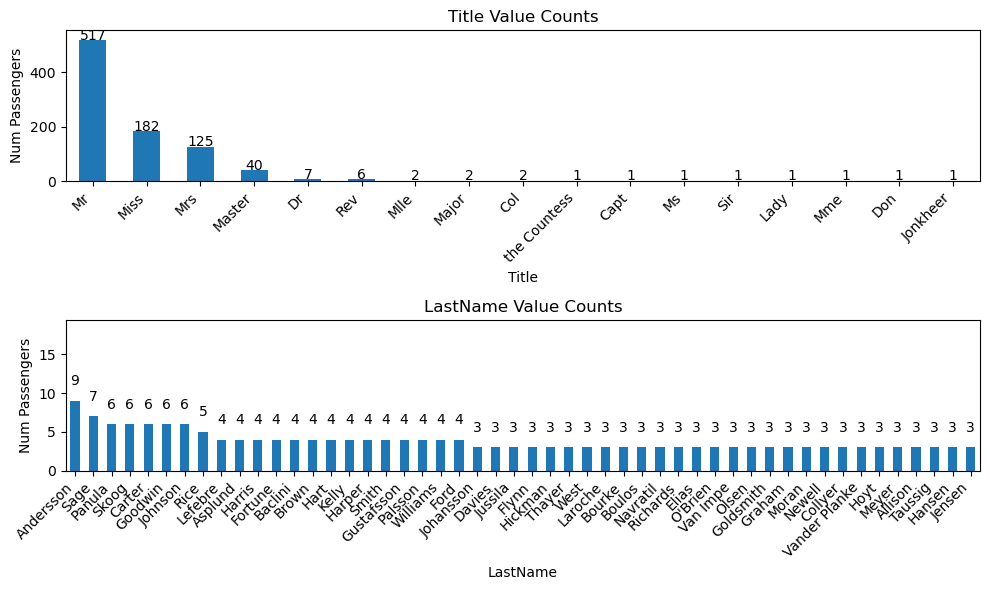

There are 143 Names with a set of parenthesis, which I extract and call "Pseudonym"
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Hewlett, Mrs. (Mary D Kingcome) '] 

There are 891 Names with a title
['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry'] 

There are 16 Names with a title followed by a space and a set of paranthesis
['Hewlett, Mrs. (Mary D Kingcome) ', 'Nye, Mrs. (Elizabeth Ramell)', 'Chibnall, Mrs. (Edith Martha Bowerman)', 'Pinsky, Mrs. (Rosa)', 'Parrish, Mrs. (Lutie Davis)'] 



,Name,Title,Pseudonym,LastName
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Florence Briggs Thayer,Cumings
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Lily May Peel,Futrelle
0,"Braund, Mr. Owen Harris",Mr,NaN,Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Florence Briggs Thayer,Cumings
15,"Hewlett, Mrs. (Mary D Kingcome)",Mrs,Mary D Kingcome,Hewlett
66,"Nye, Mrs. (Elizabeth Ramell)",Mrs,Elizabeth Ramell,Nye


In [6]:
# Handle Name
def create_name_features(temp_df):
    # Extract title from between a comma and a period (like Mr from 'Braund, Mr. Owen)
    temp_df['Title'] = temp_df['Name'].str.extract(r'.*,([^\.]+)\..*')
    temp_df['Title'] = temp_df['Title'].str.strip()
    # Extract the last name 
    temp_df['LastName'] = temp_df['Name'].str.extract(r'^(.*),.*')
    # Determine whether name has a second name (1 for true and 0 for false)
    temp_df['Pseudonym'] = temp_df['Name'].str.extract(r'.*\((.*)\).*')
    temp_df['NameLength'] = temp_df['Name'].apply(lambda x: len(x))
    return temp_df

analyze_df = create_name_features(analyze_df)

plot_value_counts(['Title', 'LastName'], [100, 50], 2, 1, figsize=(10,6))

# Validate name parsing for specific instances
# Note: in 1d I show that Name has no missing values and no duplicates
name_regex_to_check = [
    ('Name', r'.*\(.*\).*', 'a set of parenthesis, which I extract and call "Pseudonym"'),
    ('Name', r'.*,.*\..*', 'a title'),
    ('Name', r'.*\.\s\(.*$', 'a title followed by a space and a set of paranthesis')
]

# Show how often each one of those instance occured with examples
name_regex_filters = [analyze_regex(*regex_info) for regex_info in name_regex_to_check]

# Show how it was parsed for a few sample values
pd.concat([
    analyze_df[name_regex_filters[0]].head(2),
    analyze_df[name_regex_filters[1]].head(2),
    analyze_df[name_regex_filters[2]].head(2)
])[['Name', 'Title', 'Pseudonym', 'LastName']]


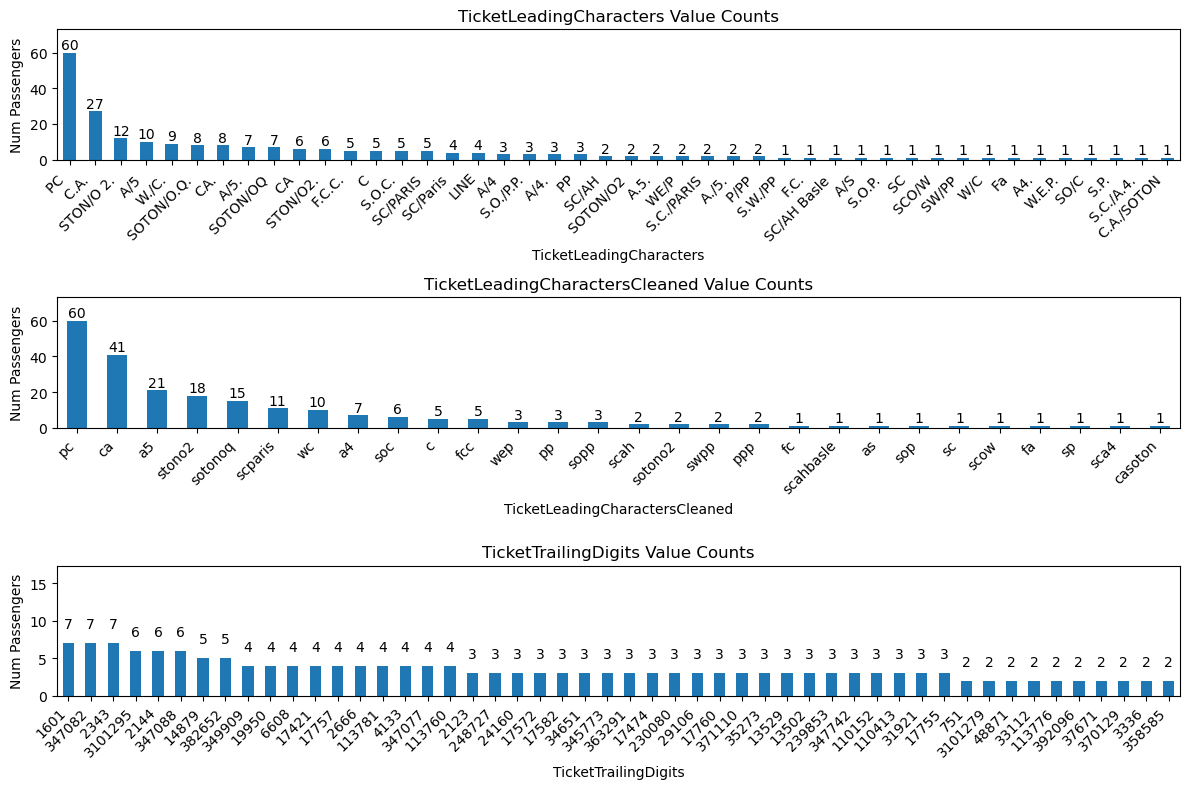

There are 661 Tickets with just digits
['113803', '373450', '330877', '17463', '349909'] 

There are 226 Tickets with a space then a series of digits
['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 'PP 9549', 'A/5. 2151'] 

There are 4 Tickets with just LINE
['LINE', 'LINE', 'LINE', 'LINE'] 



,Ticket,TicketLeadingCharacters,TicketTrailingDigits
3,113803,NaN,113803
4,373450,NaN,373450
0,A/5 21171,A/5,21171
1,PC 17599,PC,17599
179,LINE,LINE,NaN
271,LINE,LINE,NaN


In [7]:
# Handle Ticket  
def create_ticket_features(temp_df):
    # Extract the digits at the end of the string
    temp_df['TicketTrailingDigits'] = temp_df['Ticket'].str.extract(r'(\d+)$', expand=False)
    # Extract any characters before the digits
    temp_df['TicketLeadingCharacters'] = temp_df['Ticket'].str.extract(r'(.*\s)\d+$', expand=False)
    # Clean ticket leading characters (there are some that weren't manually entered correctly)
    temp_df['TicketLeadingCharactersCleaned'] = temp_df['TicketLeadingCharacters'] \
        .str.lower().str.replace('/', '').str.replace('.', '').str.replace(' ', '')
    # Account for the edge case where Ticket is just 'LINE'
    temp_df.loc[temp_df['Ticket'] == 'LINE', 'TicketLeadingCharacters'] = 'LINE'
    temp_df['TicketLength'] = temp_df['Ticket'].apply(lambda x: len(x))
    temp_df['TicketFirstCharacter'] = temp_df['Ticket'].apply(lambda x: x[0])
    return temp_df

analyze_df = create_ticket_features(analyze_df)

plot_value_counts(['TicketLeadingCharacters', 'TicketLeadingCharactersCleaned', 'TicketTrailingDigits'], [100, 100, 50], 3, 1)

# Validate Ticket parsing for specific instances 
# Note: in 1d I show that there are no missing values for Ticket
ticket_regex_to_check = [
    ('Ticket', r'^\d+$', 'just digits'),
    ('Ticket', r'.*\s\d+$', 'a space then a series of digits'),
    ('Ticket', r'LINE', 'just LINE'),
]

# Show how often each one of those instance occured
ticket_regex_filters = [analyze_regex(*regex_info) for regex_info in ticket_regex_to_check]

# Show how it was parsed for a few sample values
pd.concat([
    analyze_df[ticket_regex_filters[0]].head(2),
    analyze_df[ticket_regex_filters[1]].head(2),
    analyze_df[ticket_regex_filters[2]].head(2)
])[['Ticket', 'TicketLeadingCharacters', 'TicketTrailingDigits']]

In [ ]:
# Handle Cabin
def create_cabin_features(temp_df):
    # Extract first character (^) that's a letter ([A-Za-z])
    temp_df['DeckLetter'] = temp_df['Cabin'].str.extract(r'(^[A-Za-z])')
    temp_df['Deck'] = temp_df['DeckLetter'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})
    # Extract first character (^) that's a letter ([A-Za-z])
    temp_df['RoomNumber'] = temp_df['Cabin'].str.extract(r'(\d+)$').astype('Int64')
    temp_df['EvenRoomNumber'] = (temp_df['RoomNumber'].fillna(-1).astype(int).replace(-1, np.nan) % 2).map({0:True, 1:False})
    temp_df['OddRoomNumber'] = ((temp_df['RoomNumber'].fillna(-1).astype(int).replace(-1, np.nan) + 1) % 2).map({0:True, 1:False})
    # Look for any instances of a letter ([A-Za-z]) followed by 0 or more numbers
    temp_df['NumCabins'] = temp_df['Cabin'].str.count(r'[A-Za-z]\d*')
    return temp_df

analyze_df = create_cabin_features(analyze_df)

plot_value_counts(['Deck', 'RoomNumber', 'NumCabins', 'EvenRoomNumber'], [100, 50, 100, 100], 4, 1)

# Validate Ticket parsing for specific instances 
# Note: in 1d I show that only 204 passengers have Cabin available
cabin_regex_to_check = [
    ('Cabin', r'^([A-Za-z])$', 'a single letter'),
    ('Cabin', r'^[A-Za-z]\d+$', 'a single letter followed by digits'),
    ('Cabin', r'F [A-Za-z]\d+', 'an F, a space, then a letter followed by digits'),
    ('Cabin', r'[A-Za-z]\d+\s([A-Za-z]\s*)+', 'with multiple "letter followed by digits" - all of them share the same letter', 20)
    
]

# Show how often each one of those instance occured with examples
cabin_regex_filters = [analyze_regex(*regex_info) for regex_info in cabin_regex_to_check]

# Show how it was parsed for a few sample values
pd.concat([
    analyze_df[cabin_regex_filters[0]].head(2),
    analyze_df[cabin_regex_filters[1]].head(2),
    analyze_df[cabin_regex_filters[2]].head(2),
    analyze_df[cabin_regex_filters[3]].head(2)
])[['Cabin', 'Deck', 'RoomNumber', 'NumCabins']]

### 1d. Look for Missing Values

In [ ]:
# Look at missing values for each field 

# Combine into a DataFrame for easier plotting
missing_data = pd.DataFrame({
    'Feature': analyze_df.columns,
    'Missing': analyze_df.isnull().mean() * 100,
    'NotMissing': 100 - analyze_df.isnull().mean() * 100
})

# Plot the stacked bar chart
bar_plot = missing_data.plot(kind='bar', x='Feature', y=['Missing', 'NotMissing'], 
                            stacked=True, color=['blue', 'orange'], figsize=(12, 3))
plt.ylabel('Percentage')
plt.title('Percent Missing vs Not Missing Values by Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Adding count annotations
for p in bar_plot.patches:
    # Find where to place the text
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    annotation_num = round(height * len(analyze_df) / 100)
    if annotation_num > 0:
        bar_plot.text(x + width/2, 
                y + height/2, 
                f'{annotation_num}', 
                ha='center', 
                va='center', 
                fontsize=8, 
                color='black')
plt.show()

In [ ]:
# I create a new variable to track if certain variables are available
# Some I ignored, ex. because there were only 2 Embarked missing, its not worth creating a variable for
def create_missing_variable_features(temp_df):
    temp_df['MissingAge'] = temp_df['Age'].isna()
    temp_df['ProvidedCabin'] = ~temp_df['Cabin'].isna()
    temp_df['ProvidedPseudonym'] = ~temp_df['Pseudonym'].isna()
    temp_df['TicketHasLeadingCharacters'] = ~temp_df['TicketLeadingCharactersCleaned'].isna()
    return temp_df

analyze_df = create_missing_variable_features(analyze_df)

### 1e. Handle Missing Values 

In [ ]:
# Look at variables that have a high association with Age 
possible_features_to_help = ['Age', 'Pclass', 'Parch', 'Fare', 'Embarked', 'Title']
df_for_corr = analyze_df[possible_features_to_help].copy()
df_for_corr = pd.get_dummies(df_for_corr, columns=['Embarked', 'Title'])

# Calculate the correlation matrix
corr_matrix = df_for_corr.corr()

# Extract the correlations with Age
age_corr = corr_matrix['Age'].sort_values(ascending=False, key= lambda x: x.abs()).drop('Age')
age_corr = age_corr[age_corr.abs() > 0.1]

# Visualize the strong correlations with Age
plt.figure(figsize=(20, 6))
sns.barplot(x=age_corr.index, y=age_corr.values, hue=age_corr.index, palette="coolwarm")
plt.title('Variables and Correlation with Age')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.axhline(0.3, color='red', linestyle='--')
plt.axhline(-0.3, color='red', linestyle='--')
plt.show()
plt.tight_layout()

In [ ]:
def impute_age_by_title_and_pclass(temp_train_df, temp_test_df=None):
    
    # Function to impute missing Age values
    def impute_age(df, group_means):
        df['ImputedAge'] = df['Age']
        
        for title, pclass in group_means.index:
            condition = (df['Title'] == title) & (df['Pclass'] == pclass) & (df['ImputedAge'].isnull())
            df.loc[condition, 'ImputedAge'] = group_means.loc[(title, pclass)]

        # In case there aren't a Pclass / title combo
        df['ImputedAge'] = df['ImputedAge'].fillna(df['ImputedAge'].mean())
        
        return df

    # Calculate the mean Age by Title and Pclass in the training data
    group_means_train = temp_train_df.groupby(['Title', 'Pclass'])['Age'].mean()

    # Impute Age in the training data using only the training data's group means
    train_df = impute_age(temp_train_df, group_means_train)

    if temp_test_df is not None:
        # Combine training and test datasets for test set imputation
        combined_df = pd.concat([temp_train_df, temp_test_df], axis=0)
        
        # Calculate the mean Age by Title and Pclass using the combined data (training + test)
        group_means_combined = combined_df.groupby(['Title', 'Pclass'])['Age'].mean()
    
        # Impute Age in the test data using the combined data's group means
        temp_test_df = impute_age(temp_test_df, group_means_combined)
    
    return temp_train_df, temp_test_df  

analyze_df, _ = impute_age_by_title_and_pclass(analyze_df)

### 1e. Look for Duplicate Values 

Takeaways:
- Each passenger has a unique name and passenger ID
- Some passengers share the same ticket number
- There are 28 categories for `TicketLeadingCharactersCleaned` with ~230 passengers having that value
- Given there are 204 cabin's specified, and 147 unique cabins, some people have the same cabin
- Many people paid the same exact fare prices
- `PassengerID`, `Name`, `Ticket`, `LastName`, and `TicketTrailingDigits` have enough distinct values where we should not fit on them as a feature

In [ ]:
# Number of unique values in each field 
# Calculate the number of unique values for each column
unique_values = analyze_df.nunique()

# Create a DataFrame for easier plotting
unique_data = pd.DataFrame({'Feature': unique_values.index, 'Unique Values': unique_values.values})

# Plot the bar chart
bar_plot = unique_data.plot(kind='bar', x='Feature', y='Unique Values', figsize=(12, 4), color='blue', legend=False)
plt.xticks(rotation=90)
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values by Feature')
plt.xticks(rotation=45, ha='right')

# Add number above each bar
for index, row in unique_data.iterrows():
    bar_plot.text(index, row['Unique Values']+5, round(row['Unique Values'], 2), color='black', ha="center")

# Draw a horizontal line at total number of passengers
plt.axhline(len(analyze_df), color='red', linestyle='--')
plt.show()

In [ ]:
print(list(analyze_df.columns))


### 1f. Analyze duplicated tickets

In [ ]:
num_unique_fares_per_ticket = analyze_df.groupby('Ticket')['Fare'].nunique()
num_unique_fares_per_ticket[num_unique_fares_per_ticket > 1]

In [ ]:
analyze_df[analyze_df['Ticket'] == '7534']

In [ ]:
def create_fare_per_passenger_feature(temp_train_df, temp_test_df=None):
    num_passengers_per_ticket = temp_train_df.groupby('Ticket')['PassengerId'].transform('count')
    temp_train_df['FarePerPassenger'] = temp_train_df['Fare'] / num_passengers_per_ticket

    if temp_test_df is not None:
        num_passengers_per_ticket = pd.concat([temp_train_df, temp_test_df], axis=0).groupby('Ticket')['PassengerId'].transform('count')
        temp_test_df['FarePerPassenger'] = temp_test_df['Fare'] / num_passengers_per_ticket
        
    return temp_train_df, temp_test_df

analyze_df, _ = create_fare_per_passenger_feature(analyze_df)

shared_tickets = analyze_df[analyze_df['Ticket'].duplicated(keep=False)]
shared_tickets[['PassengerId', 'Name', 'Ticket', 'Fare', 'FarePerPassenger', 'Cabin']].sort_values(by='Ticket').head(20)

### 1f. Look for Outliers in `Fare` and `Age`

- `Fare` has some outliers and follows a more Pareto distribution (lots of passengers with low fares and few with high)
- Performing a log transform of `Fare` makes it more normally distributed and reduces outliers, so I create a new feature called `LogFare`
- Age is close to normally distributed so it doesn't need any transformations

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

create_log_fare_feature = lambda temp_df: temp_df.assign(LogFare = np.log(temp_df['Fare'] + 1))
create_log_fare_per_passenger_feature = lambda temp_df: temp_df.assign(LogFarePerPassenger = np.log(temp_df['FarePerPassenger'] + 1))
analyze_df = create_log_fare_per_passenger_feature(analyze_df)


for i, feature in enumerate(['Fare', 'FarePerPassenger', 'LogFarePerPassenger', 'Age', 'RoomNumber', 'NameLength']):
    sns.histplot(analyze_df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## 2. Data Visualization and Exploratory Data Analysis (EDA)

I'm also creating a visualization dataset by combining `train_X`, `train_y` so we can just formulate hypothesis from the training set and validate that on the validation set. 

I don't fill the missing values because I just drop them for visualizations when they exist.

See the appendix for an explanation where other features come from. 

### 2a. Data Visualization Prep

In [ ]:
# Create label for visualization
analyze_df['SurvivedLabel'] = analyze_df['Survived'].map({0:'Died', 1:'Survived'})

### 2b. Categorical Data Visualization

In [ ]:
def plot_categorical_vs_survival(temp_df, features_with_sort, rows, columns, figsize=(8,8)):
    # Create the figure and axes
    fig, axes = plt.subplots(rows, columns, figsize=figsize, sharey=True)
    axes = axes.flatten()
    
    # Plot each feature
    for i, (feature, sort_by_count) in enumerate(features_with_sort):
        count_data = temp_df.groupby(feature)['SurvivedLabel'].count()
        stacked_data = temp_df.groupby(feature)['SurvivedLabel'].value_counts(normalize=True).unstack().fillna(0)
        if sort_by_count:
            count_data = count_data.sort_values(ascending=False)
            # Sort stacked data by the number total number of passengers across that category 
            stacked_data = stacked_data.loc[count_data.index, :]
        ax = stacked_data.plot(kind='bar', stacked=True, ax=axes[i], color=['blue', 'orange'])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Proportion' if i == 0 else '')
        axes[i].set_title(f'Proportion Survived by {feature}')
        axes[i].legend(title='Outcome', loc='upper right')
    
        # Adding count annotations
        for p in ax.patches:
            # Find where to place the text
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.text(x + width/2, 
                    y + height/2, 
                    f'{round(height * count_data.iloc[int(x+0.25)])}', 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plots
    plt.show()

In [ ]:
categorical_variables = [
    ('Pclass', False),
    ('Sex', False),
    ('Embarked', False),
    ('NumCabins', False),
    ('EvenRoomNumber', False),
    ('MissingAge', False),
    ('ProvidedCabin', False),
    ('ProvidedPseudonym', False),
    ('TicketHasLeadingCharacters', False),
    ('TicketLength', False),
    ('TicketFirstCharacter', False)
]
plot_categorical_vs_survival(analyze_df, categorical_variables, 4, 3,  figsize=(12,16))

### 2c. Look at different family metrics 

In [ ]:
def create_family_size_features(temp_df):
    temp_df['Alone'] = (temp_df['Parch'] == 0) & (temp_df['SibSp'] == 0)
    temp_df['FamilySize'] = temp_df['Parch'] + temp_df['SibSp']
    temp_df['FamilySizeGroupsOrdinal'] = temp_df['FamilySize'].apply(lambda x: 0 if x==0 else 1 if x <= 3 else 2)
    temp_df['FamilySizeGroups'] = temp_df['FamilySize'].apply(lambda x: 'Solo' if x==0 else 'Nuclear' if x <= 3 else 'Big')
    return temp_df
analyze_df = create_family_size_features(analyze_df)

family_variables = [
    ('SibSp', False),
    ('Parch', False),
    ('Alone', False), 
    ('FamilySize', False),
    ('FamilySizeGroups', False)
]

plot_categorical_vs_survival(analyze_df, family_variables, 2, 3, figsize=(12,6))

In [ ]:
def create_shared_features(temp_train_df, temp_test_df = None):
    # Only cast 'SharedCabin' to object so we can use NaN with True / False
    temp_train_df['SharedCabin'] = temp_train_df['Cabin'].duplicated(keep=False).astype(object)
    temp_train_df.loc[temp_train_df['Cabin'].isna(), 'SharedCabin'] = np.nan
    temp_train_df['SharedTicket'] = temp_train_df['Ticket'].duplicated(keep=False)
    temp_train_df['SharedLastName'] = temp_train_df['LastName'].duplicated(keep=False)

    # Do not include if shared by other test data
    if temp_test_df is not None:
        temp_test_df['SharedCabin'] = temp_test_df['Cabin'].duplicated(keep=False).astype(object)
        temp_test_df.loc[temp_test_df['Cabin'].isna(), 'SharedCabin'] = np.nan
        temp_test_df['SharedTicket'] = temp_test_df['Ticket'].isin(temp_train_df['Ticket']).any()
        temp_test_df['SharedLastName'] = temp_test_df['LastName'].isin(temp_train_df['LastName']).any()

    return temp_train_df, temp_test_df

analyze_df, _ = create_shared_features(analyze_df)

shared_variables = [
    ('SharedCabin', False),
    ('SharedTicket', False),
    ('SharedLastName', False)
]

plot_categorical_vs_survival(analyze_df, shared_variables, 1, 3, figsize=(12,4))

In [ ]:
print(analyze_df['Fare'][analyze_df['SharedTicket'] == True].median())
print(analyze_df['Fare'][analyze_df['SharedTicket'] == False].median())


### 2d. Reduce the number of categories for `Title`, `TicketLeadingCharacters`, and `Deck`

In [ ]:
def create_reduced_features(temp_df):
    # Make less categories for Title
    valid_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Ms']
    temp_df['TitleCondensed'] = np.where(temp_df['Title'].isin(valid_titles), temp_df['Title'], 'Other')
    # Make less categories for TicketLeadingCharacters
    select_tickets = ['pc', 'ca', 'a5', 'stono2', 'sotonq', 'scparis', 'wc', 'a4']
    temp_df['TicketLeadingCharactersCleanedCondensed'] = np.where(temp_df['TicketLeadingCharactersCleaned'].isin(select_tickets), 
                                                           temp_df['TicketLeadingCharactersCleaned'], 'Other')
    # Make sure it doesnt get filled in if there was no ticket leading characters
    temp_df['TicketLeadingCharactersCleanedCondensed'] = np.where(temp_df['TicketLeadingCharacters'].isna(), 
                                                           np.nan, temp_df['TicketLeadingCharactersCleanedCondensed'])
    # Remove T category from Deck 
    temp_df['DeckCondensedOrdinal'] = temp_df['Deck'].replace(8, 7)
    temp_df['DeckCondensed'] = temp_df['DeckLetter'].replace('T', 'G')

    # Make less categories for TicketFirstCharacter
    valid_ticket_first_character = ['1', '2', '3', 'A', 'C', 'P', 'S']
    mostly_died_ticket_first_character = ['4', '5', '6', '7', '8', 'L', 'W']
    temp_df['TicketFirstCharacterCondensed'] = temp_df['TicketFirstCharacter'].apply(lambda x: x if x in valid_ticket_first_character
                                                                                    else 'Bad' if x in mostly_died_ticket_first_character
                                                                                    else 'Other')
    return temp_df

analyze_df = create_reduced_features(analyze_df)

condensed_variables = [
    ('Title', True),
    ('TitleCondensed', True),
    ('TicketLeadingCharactersCleaned', True),
    ('TicketLeadingCharactersCleanedCondensed', True),
    ('Deck', False),
    ('DeckCondensedOrdinal', False),
    ('TicketFirstCharacter', False),
    ('TicketFirstCharacterCondensed', False)
]

plot_categorical_vs_survival(analyze_df, condensed_variables, 4, 2, figsize=(16,16))

### 2e. Look at `Age`
- There were more outliers of extremely old people who died rather than survived
- Otherwise the distributions of age between those who survived and died seems similar

In [ ]:
analyze_df[['Age', 'ImputedAge']]

In [ ]:
def plot_continuous_distributions(feature, axes, start_axis=0, bins=50):
    
    sns.boxplot(x='SurvivedLabel', y=feature, data=analyze_df, ax=axes[start_axis])
    axes[start_axis].set_title(f'Boxplot of {feature} over Survival')
    
    sns.histplot(analyze_df[feature][analyze_df['SurvivedLabel'] == 'Survived'], kde=True, bins=bins, ax=axes[start_axis+1])
    axes[start_axis+1].set_title(f'Histogram of {feature} for Survived')
    axes[start_axis+1].set_xlabel(feature)
    axes[start_axis+1].set_ylabel('Frequency')
    
    sns.histplot(analyze_df[feature][analyze_df['SurvivedLabel'] == 'Died'], kde=True, bins=bins, ax=axes[start_axis+2])
    axes[start_axis+2].set_title(f'Histogram of {feature} for Died')
    axes[start_axis+2].set_xlabel(feature)
    axes[start_axis+2].set_ylabel('Frequency')

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

plot_continuous_distributions('ImputedAge', axes, bins=30)

plt.tight_layout()
plt.show()

In [ ]:
def create_age_features(temp_df):
    # Try different age buckets
    age_bins = [0, 1, 2, 4, 6, 10, 20, 30, 40, 60, 65, 70, 100]
    age_labels = ['({a},{b}]'.format(a=age, b=age_bins[i+1]) for i, age in enumerate(age_bins[0:-1])]
    temp_df['AgeGroupBuckets'] = pd.cut(temp_df['Age'], bins=age_bins, labels=age_labels)
    temp_df['ImputedAgeGroupBuckets'] = pd.cut(temp_df['ImputedAge'], bins=age_bins, labels=age_labels)
    
    # For visualization and determining threshold
    temp_df['IsChild'] = temp_df['Age'] <= 6
    temp_df['IsSenior'] = temp_df['Age'] >= 60

    # Try different age buckets
    age_bins = [0, 6, 60, 100]
    temp_df['AgeGroupsOrdinal'] = pd.cut(temp_df['Age'], bins=age_bins, labels=[1, 2, 3]).astype('Int64')
    temp_df['ImputedAgeGroupsOrdinal'] = pd.cut(temp_df['ImputedAge'], bins=age_bins, labels=[1, 2, 3]).astype('Int64')
    age_labels = ['({a},{b}]'.format(a=age, b=age_bins[i+1]) for i, age in enumerate(age_bins[0:-1])]
    temp_df['ImputedAgeGroups'] = pd.cut(temp_df['ImputedAge'], bins=age_bins, labels=age_labels)

   
    # Specified by Kaggle info
    temp_df['AgeIsEstimated'] = (temp_df['Age'] > 1) & (temp_df['Age'] % 1 == 0.5)
    return temp_df

analyze_df = create_age_features(analyze_df)

age_variables = [
    ('AgeGroupBuckets', False),
    ('ImputedAgeGroupBuckets', False),
    ('AgeGroupsOrdinal', False),
    ('ImputedAgeGroupsOrdinal', False),
    ('AgeIsEstimated', False)
]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Some weird warning is happening
    plot_categorical_vs_survival(analyze_df, age_variables, 2, 3, figsize=(16,12))

### 2f. Look at `Fare`


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

plot_continuous_distributions('FarePerPassenger', axes, bins=30)
plot_continuous_distributions('LogFarePerPassenger', axes, start_axis=3, bins=30)

plt.tight_layout()
plt.show()

In [ ]:
def create_fare_features(temp_df):
    # Try different age buckets
    log_fare_bins = [0, 2, 2.25, 2.5, 3, 4, 5, 7]
    log_fare_labels = ['({a},{b}]'.format(a=log_fare, b=log_fare_bins[i+1]) for i, log_fare in enumerate(log_fare_bins[0:-1])]
    temp_df['LogFarePerPassengerBuckets'] = pd.cut(temp_df['LogFarePerPassenger'], bins=log_fare_bins, labels=log_fare_labels)

    # Try different age buckets
    log_fare_bins = [-1, 3, 4, 8]
    temp_df['LogFarePerPassengerGroupsOrdinal'] = pd.cut(temp_df['LogFarePerPassenger'], bins=log_fare_bins, labels=[0,1,2])

    temp_df['LowLogFarePerPassenger'] = temp_df['LogFarePerPassenger'] <= 3
    temp_df['HighLogFarePerPassenger'] = temp_df['LogFarePerPassenger'] >= 4

    return temp_df

analyze_df = create_fare_features(analyze_df)

fare_variables = [
    ('LogFarePerPassengerBuckets', False),
    ('LogFarePerPassengerGroupsOrdinal', False),
    ('LowLogFarePerPassenger', False),
    ('HighLogFarePerPassenger', False)
]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Some weird warning is happening
    plot_categorical_vs_survival(analyze_df, fare_variables, 2, 2, figsize=(16,12))

### 2g: Room Number

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))
axes = axes.flatten()

plot_continuous_distributions('RoomNumber', axes, bins=30)

plt.tight_layout()
plt.show()

In [ ]:
def create_room_number_features(temp_df):
    # Try different age buckets
    room_number_bins = [0,25,50,75,100,125,150]
    room_number_labels = ['({a},{b}]'.format(a=room_number, b=room_number_bins[i+1]) for i, room_number in enumerate(room_number_bins[0:-1])]
    temp_df['RoomNumberExplore'] = pd.cut(temp_df['RoomNumber'], bins=room_number_bins, labels=room_number_labels)

    # Try different age buckets
    room_number_bins = [0, 29, 66, 150]
    temp_df['RoomNumberGroupsOrdinal'] = pd.cut(temp_df['RoomNumber'], bins=room_number_bins, labels=[1,2,3]).astype('Int64')
    room_number_labels = ['({a},{b})'.format(a=room_number, b=room_number_bins[i+1]) for i, room_number in enumerate(room_number_bins[0:-1])]
    temp_df['RoomNumberGroups'] = pd.cut(temp_df['RoomNumber'], bins=room_number_bins, labels=room_number_labels)

    return temp_df

analyze_df = create_room_number_features(analyze_df)

room_variables = [
    ('RoomNumberExplore', False),
    ('RoomNumberGroupsOrdinal', False),
    ('RoomNumberGroups', False)
]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Some weird warning is happening
    plot_categorical_vs_survival(analyze_df, room_variables, 1, 3, figsize=(16,4))

### 2h. Name Length

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(24, 8))
axes = axes.flatten()

plot_continuous_distributions('NameLength', axes, bins=30)
plot_continuous_distributions('TicketLength', axes, start_axis=3, bins=15)


plt.tight_layout()
plt.show()

In [ ]:
sorted(analyze_df['TicketLength'].unique())

# Feature Engineering

In [ ]:
def create_one_hot_features(temp_train_df, temp_test_df, temp_one_hot_features):

    old_train_columns = list(temp_train_df.columns)
    
    temp_dummy_columns = [feature + '_dummy' for feature in temp_one_hot_features]
    temp_train_df[temp_dummy_columns] = temp_train_df[temp_one_hot_features]
    temp_test_df[temp_dummy_columns] = temp_test_df[temp_one_hot_features]
    
    temp_train_df = pd.get_dummies(temp_train_df, columns=temp_dummy_columns, prefix=temp_one_hot_features)
    new_train_columns = list(temp_train_df.columns)
    added_train_columns = [value for value in new_train_columns if value not in old_train_columns]
    
    old_test_columns = list(temp_test_df.columns)
    temp_test_df = pd.get_dummies(temp_test_df, columns=temp_dummy_columns, prefix=temp_one_hot_features)
    new_test_columns = list(temp_test_df.columns)
    added_test_columns = [value for value in new_test_columns if value not in old_test_columns]
    
    for column in added_train_columns:
        if column not in added_test_columns:
            temp_test_df[column] = False
    
    for column in added_test_columns:
        if column not in added_train_columns:
            temp_train_df[column] = False

    return temp_train_df, temp_test_df, list(set(added_train_columns + added_test_columns))

def create_simple_features(temp_df):
    temp_df['PclassOrdinal'] = temp_df['Pclass']
    return temp_df

def impute_missing_value_features_simple(temp_train_df, temp_test_df):
    temp_train_df['Age'].fillna(0, inplace=True), temp_test_df['Age'].fillna(0, inplace=True)
    temp_train_df['AgeGroupsOrdinal'].fillna(0, inplace=True), temp_test_df['AgeGroupsOrdinal'].fillna(0, inplace=True)
    # min RoomNumber is 2 
    temp_train_df['RoomNumber'].fillna(0, inplace=True), temp_test_df['RoomNumber'].fillna(0, inplace=True)
    temp_train_df['RoomNumberGroupsOrdinal'].fillna(0, inplace=True), temp_test_df['RoomNumberGroupsOrdinal'].fillna(0, inplace=True)
    # 1 indexed starting at A so this is ok
    temp_train_df['Deck'].fillna(0, inplace=True), temp_test_df['Deck'].fillna(0, inplace=True)
    temp_train_df['DeckCondensedOrdinal'].fillna(0, inplace=True), temp_test_df['DeckCondensedOrdinal'].fillna(0, inplace=True)
    # if cabin existed NumCabins = 1
    temp_train_df['NumCabins'].fillna(0, inplace=True), temp_test_df['NumCabins'].fillna(0, inplace=True)
    # SharedCabin is a boolean
    temp_train_df['SharedCabin'].fillna(False, inplace=True), temp_test_df['SharedCabin'].fillna(False, inplace=True)
    temp_train_df['EvenRoomNumber'].fillna(False, inplace=True), temp_test_df['EvenRoomNumber'].fillna(False, inplace=True)
    temp_train_df['OddRoomNumber'].fillna(False, inplace=True), temp_test_df['OddRoomNumber'].fillna(False, inplace=True)

    
    return temp_train_df, temp_test_df

In [ ]:
feature_cols = original_df.columns.drop('Survived')
train_X, val_X, train_y, val_y = train_test_split(original_df[feature_cols], original_df['Survived'], random_state = 51)
print('Number of passengers in training set: ' + str(len(train_X)))
print('Number of passengers in validation set: ' + str(len(val_X)))
print(list(train_X.columns))

In [ ]:
# Junk Features (not to be used in the model)
junk_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Pseudonym', 'LastName', 'TicketTrailingDigits', 
                 'TicketLeadingCharacters', 'TicketLeadingCharactersCleaned', 'Title']

# Continuous Features (cont_features)
cont_features = ['Age', 'FarePerPassenger', 'LogFarePerPassenger', 'RoomNumber']

# Ordinal Features (ordinal_features)
ordinal_features = ['PclassOrdinal', 'SibSp', 'Parch', 'Deck', 'DeckCondensedOrdinal', 'NumCabins', 'FamilySize', 'SharedCabin', 'AgeGroupsOrdinal', 
                   'LogFarePerPassengerGroupsOrdinal', 'RoomNumberGroupsOrdinal', 'FamilySizeGroupsOrdinal', 'ImputedAgeGroupsOrdinal']

# Binary Features (features that can be represented as 0/1 or True/False)
binary_features = ['ProvidedCabin', 'ProvidedPseudonym', 'TicketHasLeadingCharacters', 'Alone', 'SharedTicket', 'SharedLastName', 
                   'AgeIsEstimated', 'EvenRoomNumber', 'OddRoomNumber']

# One-Hot Encoded Features (features that require one-hot encoding for multiple categories)
one_hot_features_original = ['Sex', 'Embarked', 'Title', 'TitleCondensed', 'TicketLeadingCharactersCleanedCondensed', 'DeckCondensed', 
                             'RoomNumberGroups', 'FamilySizeGroups', 'Pclass', 'TicketFirstCharacterCondensed', 'ImputedAgeGroups']

def engineer_features(temp_train_df, temp_test_df):
    
    # Call feature functions made in all the above steps
    
    # Features made by parsing original columns
    temp_train_df, temp_test_df = create_name_features(temp_train_df), create_name_features(temp_test_df)
    temp_train_df, temp_test_df = create_ticket_features(temp_train_df), create_ticket_features(temp_test_df)
    temp_train_df, temp_test_df = create_cabin_features(temp_train_df), create_cabin_features(temp_test_df)
    temp_train_df, temp_test_df = create_missing_variable_features(temp_train_df), create_missing_variable_features(temp_test_df)
    # Impute original columns
    temp_train_df, temp_test_df =  impute_age_by_title_and_pclass(temp_train_df, temp_test_df)

    # Features engineered by manipulating original columns
    temp_train_df, temp_test_df = create_fare_per_passenger_feature(temp_train_df, temp_test_df)
    temp_train_df, temp_test_df = create_log_fare_feature(temp_train_df), create_log_fare_feature(temp_test_df)
    temp_train_df, temp_test_df = create_log_fare_per_passenger_feature(temp_train_df), create_log_fare_per_passenger_feature(temp_test_df)
    temp_train_df, temp_test_df = create_family_size_features(temp_train_df), create_family_size_features(temp_test_df)
    temp_train_df, temp_test_df = create_shared_features(temp_train_df, temp_test_df)
    temp_train_df, temp_test_df = create_reduced_features(temp_train_df), create_reduced_features(temp_test_df)
    temp_train_df, temp_test_df = create_age_features(temp_train_df), create_age_features(temp_test_df)
    temp_train_df, temp_test_df = create_fare_features(temp_train_df), create_fare_features(temp_test_df)
    temp_train_df, temp_test_df = create_room_number_features(temp_train_df), create_room_number_features(temp_test_df)
    
    # Turn the non-ordinal categorical features to one-hot encoded
    temp_train_df, temp_test_df = create_simple_features(temp_train_df), create_simple_features(temp_test_df)
    temp_train_df, temp_test_df, one_hot_features = create_one_hot_features(temp_train_df, temp_test_df, one_hot_features_original)
    
    # Fill in the missing features
    print('Features with missing values:')
    for feature in cont_features + ordinal_features + binary_features + one_hot_features:
        temp_combined_df = pd.concat([temp_train_df, temp_test_df])
        num_na = len(temp_combined_df[feature][temp_combined_df[feature].isna()])
        if num_na > 0:
            print(feature, str(num_na))
    
    temp_train_df, temp_test_df = impute_missing_value_features_simple(temp_train_df, temp_test_df)
    
    return temp_train_df, temp_test_df, one_hot_features

train_X, val_X, one_hot_features = engineer_features(train_X, val_X)

title_features = [feature for feature in one_hot_features if 'Title' in feature and 'Condensed' not in feature]
title_condensed_features = [feature for feature in one_hot_features if 'TitleCondensed' in feature and 'Other' not in feature]
title_condensed_features_with_other = [feature for feature in one_hot_features if 'TitleCondensed' in feature]
ticket_features = [feature for feature in one_hot_features if 'TicketLeadingCharactersCleanedCondensed' in feature]
embarked_features = [feature for feature in one_hot_features if 'Embarked' in feature]
deck_features = [feature for feature in one_hot_features if 'DeckCondensed' in feature]
room_number_features = [feature for feature in one_hot_features if 'RoomNumber' in feature]
family_size_features = [feature for feature in one_hot_features if 'FamilySize' in feature]
pclass_features = [feature for feature in one_hot_features if 'Pclass' in feature]
ticket_first_character_features = [feature for feature in one_hot_features if 'TicketFirstCharacterCondensed' in feature]
age_group_features = [feature for feature in one_hot_features if 'ImputedAge' in feature]

In [ ]:
relevant_features = cont_features + ordinal_features + binary_features + one_hot_features

train_X_with_y = pd.concat([train_X[relevant_features], train_y], axis=1).copy()

# Compute the correlation matrix
correlation_matrix = train_X_with_y.corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 24))

# Draw the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Adjust the title and show the plot
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
percent_survived_train, percent_survived_val = train_y.sum() / len(train_y), val_y.sum() / len(val_y)
print('{a:.2%} of the training dataset Survived, {b:.2%} Died, {c} passengers total'.format(
    a=percent_survived_train, 
    b=1-percent_survived_train,
    c=len(train_y)
))
print('{a:.2%} of the validation dataset Survived, {b:.2%} Died, {c} passengers total'.format(
    a=percent_survived_val, 
    b=1-percent_survived_val,
    c=len(val_y)
))

# Modeling

In [ ]:
def run_model_on_features(feature_list, axis):
    # Extract features for training and validation
    train_X_features, val_X_features = train_X[feature_list].copy(), val_X[feature_list].copy()
    
    # Initialize and fit the model
    model = RandomForestClassifier(
         oob_score=True, random_state=1, n_jobs=-1,
        min_samples_split=10, n_estimators=700, class_weight='balanced', criterion='gini',
        min_samples_leaf=1
    )
    model.fit(train_X_features, train_y)
    
    # Predict on validation set
    predictions = model.predict(val_X_features)
    predictions_proba = model.predict_proba(val_X_features)[:, 1]  # Probability for the positive class
    
    # Feature importance plot
    feature_importances = pd.Series(model.feature_importances_, index=train_X_features.columns)
    feature_importances.sort_values().plot(kind='barh', ax=axis)
    val_accuracy = round(accuracy_score(val_y, predictions), 3)
    val_f1_score = round(f1_score(val_y, predictions), 3)
    axis.set_title('Accuracy: ' +  str(val_accuracy) + ', F1 Score: ' + str(val_f1_score))
    axis.set_xlabel('Importance')
    axis.set_ylabel('Feature')
    
    return val_accuracy, model

def run_model_on_feature_list(features_list, r, c, figsize=None):
    if figsize is None: figsize=(24, 4*r)
    fig, axes = plt.subplots(r, c, figsize=figsize)
    axes = axes.flatten()

    for i, features in enumerate(features_list):
        run_model_on_features(features, axes[i])

    plt.tight_layout()
    plt.show()

In [ ]:
features_list = [
    ['Sex_male'],
    ['Sex_male', 'Age'],
    ['Sex_male', 'Age', 'MissingAge'],
    ['Sex_male', 'ImputedAge'],
    ['Sex_male', 'ImputedAge', 'MissingAge']
]

run_model_on_feature_list(features_list, 1, 5)

selected_features = ['Sex_male', 'AgeGroupsOrdinal', 'MissingAge', 'AgeIsEstimated']

In [ ]:
features_list = [
    ['Sex_male'],
    ['Sex_male', 'DeckCondensedOrdinal'],
    ['Sex_male', 'ProvidedCabin'] + deck_features
]

run_model_on_feature_list(features_list, 1, 3)

In [ ]:
features_list = [
    ['Sex_male'],
    ['Sex_male', 'RoomNumberGroupsOrdinal'],
    ['Sex_male', 'ProvidedCabin'] + room_number_features
]

run_model_on_feature_list(features_list, 1, 3)

In [ ]:
features_list = [
    ['Sex_male'],
    ['Sex_male', 'FamilySize'],
    ['Sex_male', 'FamilySizeGroupsOrdinal'],
    ['Sex_male'] + family_size_features
]

run_model_on_feature_list(features_list, 1, 4)

In [ ]:
features_list = [
    ['Sex_male'],
    ['Sex_male', 'Fare'],
    ['Sex_male', 'FarePerPassenger']
]

run_model_on_feature_list(features_list, 1, 3)

In [ ]:
features_list = [
    ['Sex_male', 'ImputedAge', 'MissingAge', 'ProvidedCabin', 'Fare', 'ProvidedPseudonym', 'TicketLength'] \
    + embarked_features + title_features + deck_features + room_number_features + family_size_features \
    + pclass_features + ticket_first_character_features,
    ['Sex_male', 'ImputedAge', 'MissingAge', 'ProvidedCabin', 'Fare', 'ProvidedPseudonym', 'TicketLength'] \
    + embarked_features + title_condensed_features_with_other + deck_features + room_number_features + family_size_features \
    + pclass_features + ticket_first_character_features
]

run_model_on_feature_list(features_list, 1, 2, figsize=(16, 8))
display(sorted(features_list[0]), len(features_list[0]))

In [ ]:
print(selected_features)

In [ ]:
from xgboost import XGBClassifier
features_list = [
    ['Sex_male', 'ImputedAge', 'MissingAge', 'ProvidedCabin', 'Fare', 'ProvidedPseudonym', 'TicketLength'] \
    + embarked_features + title_features + deck_features + room_number_features + family_size_features \
    + pclass_features + ticket_first_character_features,
]
model = XGBClassifier()
model.fit(train_X[features_list[0]], train_y)

In [ ]:
predictions = model.predict(val_X[features_list[0]])
accuracy_score(val_y, predictions)

# Hyperparameter Tuning

In [ ]:
def tune_hyperparameters(features, temp_train_X, temp_train_y, temp_test_X=None, temp_test_y=None):
    
    temp_train_X = temp_train_X[features].copy()
    
    # Define the parameter grid
    param_grid = { 
        "criterion" : ["gini", "entropy"], 
        "min_samples_leaf" : [1, 5, 10], 
        "min_samples_split" : [2, 4, 10, 12, 16], 
        "n_estimators": [50, 100, 400, 700, 1000]
    }
    
    # Initialize the model
    rf = RandomForestClassifier(random_state=42)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    
    # Fit GridSearchCV
    grid_search.fit(temp_train_X, temp_train_y)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

    if temp_test_X is not None:
        temp_test_X = temp_test_X[features].copy()
        
        # Evaluate the model with the best parameters on the validation set
        
        y_pred = best_model.predict(temp_test_X)
        accuracy = accuracy_score(temp_test_y, y_pred)
        print(f"Validation Accuracy: {accuracy:.4f}")
        print('\n')

    return best_model

In [ ]:
features_to_tune = [
    ['Sex_male', 'Sex_female', 'ImputedAge', 'MissingAge', 'ProvidedCabin', 'Fare', 'NameLength', 'TicketLength'] \
    + embarked_features + title_features + deck_features + room_number_features + family_size_features \
    + pclass_features + ticket_first_character_features
]

for features in features_to_tune:
    print('Tuning with', features)
    tune_hyperparameters(features, train_X, train_y, val_X, val_y)

# Submit Prediction

In [ ]:
final_train_original = pd.read_csv('train.csv')
final_test_X_original = pd.read_csv('test.csv')

final_train, final_test_X = final_train_original.copy(), final_test_X_original.copy()

final_test_X['Fare'] = final_test_X['Fare'].fillna(final_train['Fare'].mean())

final_train_X = final_train.loc[:, final_train.columns != 'Survived']
final_train_y = final_train['Survived']

new_indices = list(range(len(final_train_X), len(final_train_X) + len(final_test_X)))

final_test_X = final_test_X.set_index([pd.Index(new_indices)])

final_train_X, final_test_X, one_hot_features = engineer_features(final_train_X, final_test_X)


In [ ]:
# Tune to a model with specific hyperparameters
final_features = ['Sex_male', 'ImputedAge', 'MissingAge', 'ProvidedCabin', 'Fare', 'ProvidedPseudonym', 'TicketLength'] \
    + embarked_features + title_features + deck_features + room_number_features + family_size_features \
    + pclass_features + ticket_first_character_features
# model = RandomForestClassifier(criterion='gini', 
#                              n_estimators=700,
#                              min_samples_split=10,
#                              min_samples_leaf=1,
#                              max_features='auto',
#                              oob_score=True,
#                              random_state=1,
#                              n_jobs=-1)

model = XGBClassifier()
model.fit(final_train_X[final_features], final_train_y)
# print("%.4f" % model.oob_score_)

In [ ]:
# Train a model on tuned hyperparameters
# final_features = features_to_tune[0]
# model = tune_hyperparameters(final_features, final_train_X, final_train_y)
# print(model.score(final_train_X[final_features], final_train_y))

In [ ]:
submission_predictions = model.predict(final_test_X[final_features])
submission1 = final_test_X.copy()
submission1['Survived'] = submission_predictions
submission1[['PassengerId', 'Survived']].to_csv('my_submission.csv', index=False)

In [ ]:
submission

In [ ]:
display(sorted(title_features))
display(sorted(title_condensed_features))
final_test_X['Title'].value_counts()

In [ ]:
b = pd.concat([submission[['PassengerId', 'Survived']].add_prefix('old_'), 
           submission1[['PassengerId', 'Survived']].add_prefix('new_')], 
          axis=1)
b[b['old_Survived'] != b['new_Survived']]

In [ ]:
final_test_X_original[final_test_X_original['PassengerId'].isin((979, 1057))]

### Compare to other solution

In [ ]:
my_test = final_test_X[['PassengerId'] + list(final_features)].copy()
my_test['Survived'] = submission_predictions
my_test = my_test.sort_values(by='PassengerId').reset_index()
other_test = pd.read_csv('./Other Solutions/82 78/other_test.csv')
other_test = other_test.sort_values(by='PassengerId').reset_index()
display(my_test.head(2))
display(other_test.head(2))

In [ ]:
display(my_test.columns)
display(other_test.columns)

In [ ]:
# Mapping from your columns to the other solution's columns
my_to_other = {
    'Sex_male': 'Sex_male',
    'Sex_female': 'Sex_female',
    'ImputedAge': 'Age',
    'MissingAge': 'Age_Null_Flag',
    'ProvidedCabin': 'Cabin_Letter_n',  # No direct match
    'Fare': 'Fare',
    'NameLength': 'Name_Len',
    'TicketLength': 'Ticket_Len',
    'Embarked_S': 'Embarked_S',
    'Embarked_Q': 'Embarked_Q',
    'Embarked_C': 'Embarked_C',
    'TitleCondensed_Ms': 'Name_Title_Ms.',
    'TitleCondensed_Master': 'Name_Title_Master.',
    'TitleCondensed_Mrs': 'Name_Title_Mrs.',
    'TitleCondensed_Rev': 'Name_Title_Rev.',
    'TitleCondensed_Miss': 'Name_Title_Miss.',
    'TitleCondensed_Dr': 'Name_Title_Dr.',
    'TitleCondensed_Mr': 'Name_Title_Mr.',
    'TitleCondensed_Col': 'Name_Title_Col.',
    'DeckCondensed_G': 'Cabin_Letter_G',
    'DeckCondensed_F': 'Cabin_Letter_F',
    'DeckCondensed_E': 'Cabin_Letter_E',
    'DeckCondensed_D': 'Cabin_Letter_D',
    'DeckCondensed_C': 'Cabin_Letter_C',
    'DeckCondensed_A': 'Cabin_Letter_A',
    'DeckCondensed_B': 'Cabin_Letter_B',
    'RoomNumberGroups_(0,29]': 'Cabin_num_(1.999, 28.667]',  # Approximate mapping
    'RoomNumberGroups_(29,66]': 'Cabin_num_(28.667, 65.667]',   # Approximate mapping
    'RoomNumberGroups_(66,150]': 'Cabin_num_(65.667, 148.0]',   # Approximate mapping
    'FamilySizeGroups_Big': 'Fam_Size_Big',
    'FamilySizeGroups_Solo': 'Fam_Size_Solo',
    'FamilySizeGroups_Nuclear': 'Fam_Size_Nuclear',
    'Pclass_2': 'Pclass_2',
    'Pclass_1': 'Pclass_1',
    'Pclass_3': 'Pclass_3',
    'TicketFirstCharacterCondensed_1': 'Ticket_Lett_1',
    'TicketFirstCharacterCondensed_3': 'Ticket_Lett_3',
    'TicketFirstCharacterCondensed_2': 'Ticket_Lett_2',
    'TicketFirstCharacterCondensed_Bad': 'Ticket_Lett_Low_ticket',  # Approximate mapping
    'TicketFirstCharacterCondensed_P': 'Ticket_Lett_P',
    'TicketFirstCharacterCondensed_A': 'Ticket_Lett_A',
    'TicketFirstCharacterCondensed_C': 'Ticket_Lett_C',
    'TicketFirstCharacterCondensed_Other': 'Ticket_Lett_Other_ticket',  # Approximate mapping
    'TicketFirstCharacterCondensed_S': 'Ticket_Lett_S',
}

# Mapping from the other solution's columns to your columns
other_to_my = {v: k for k, v in my_to_other.items() if v is not None}

In [ ]:
for i in range(len(my_to_other)):
    my_feature, other_feature = list(my_to_other.keys())[i], list(my_to_other.values())[i]
    # my_feature = 'ImputedAge'
    # other_feature = my_to_other[my_feature]
    
    a = pd.concat([my_test[['PassengerId', my_feature, 'Survived']].add_prefix('my_'), 
                   other_test[[other_feature, 'PassengerId', 'Survived']].add_prefix('other_')], 
                  axis=1)
    diff = a[a['my_' + my_feature] != a['other_' + other_feature]]
    if len(diff) != 0 and my_feature != 'ProvidedCabin': 
        print(my_feature, other_feature)
        display(diff)

In [ ]:
pd.set_option('display.max_columns', None)
w = pd.read_csv('test.csv')

i = 28
my_feature, other_feature = list(my_to_other.keys())[i], list(my_to_other.values())[i]
# my_feature = 'ImputedAge'
# other_feature = my_to_other[my_feature]
# my_feature, other_feature = 'Survived', 'Survived'

a = pd.concat([my_test[['PassengerId', my_feature, 'Survived']].add_prefix('my_').reset_index(drop=True), 
               other_test[[other_feature, 'PassengerId', 'Survived']].add_prefix('other_')], 
              axis=1)
# diff = a[a['my_' + my_feature] != a['other_' + other_feature]]
diff = a[a['my_' + 'Survived'] != a['other_' + 'Survived']]

if len(diff) != 0 and my_feature != 'ProvidedCabin': 
    print(my_feature, other_feature)
    display(diff)
    display(w[w['PassengerId'].isin(diff['my_PassengerId'])])
    display(len(diff))

In [ ]:
# Try feature selection method RFE

relevant_features = [feature for feature in cont_features + binary_features + ordinal_features + one_hot_features \
                     if feature not in ['Sex_female']]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=4)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(train_X[relevant_features], train_y)
rfe_columns = train_X[relevant_features].columns[rfe.support_]
print("Selected Features: %s" % rfe_columns)

model.fit(train_X[rfe_columns], train_y)
val_predictions = model.predict(val_X[rfe_columns])
# train_predictions =  model.predict(train_X[rfe_columns])
# str(round(accuracy_score(train_y, train_predictions), 3))
print(str(round(accuracy_score(val_y, val_predictions), 3)))

feature_importances = pd.Series(model.feature_importances_, index=rfe_columns)
ax = feature_importances.sort_values().plot(kind='barh')
ax.set_title('Accuracy: ' +  str(round(accuracy_score(val_y, val_predictions), 3)))
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.show()

## Correlation of features

In [ ]:
# Assuming train_X_encoded, val_X, and train_y are already defined
train_X_encoded_with_y = pd.concat([train_X_encoded, train_y], axis=1).copy()

# Compute the correlation matrix
correlation_matrix = train_X_encoded_with_y.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Adjust the title and show the plot
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

from sklearn.feature_selection import chi2, f_classif

# Chi-Square for categorical data
chi_scores, p_values = chi2(train_X_encoded[cat_features], y=train_y)

chi2_results = pd.DataFrame({
    'Feature': cat_features,
    'Chi2 Score': chi_scores,
    'P-value': p_values
})

chi2_results.sort_values(by='Chi2 Score', ascending=False, inplace=True)
print(chi2_results)

from sklearn.feature_selection import f_classif

# ANOVA F-test for Continuous Features
f_scores, p_values = f_classif(train_X_encoded[cont_features], train_y)

anova_results = pd.DataFrame({
    'Feature': cont_features,
    'F Score': f_scores,
    'P-value': p_values
})
anova_results.sort_values(by='F Score', ascending=False, inplace=True)
print(anova_results)

## Analyze Values in `Name`, `Ticket`, and `Cabin`

### Show Cabin and Ticket that share the same values 

In [ ]:
# Show passengers with the same ticket numbers

# Group by 'Ticket' and filter to only those tickets that appear more than once
ticket_counts = analyze_df['Ticket'].value_counts()
shared_tickets = ticket_counts[ticket_counts > 1].index

# Select passengers with these shared tickets
shared_ticket_passengers = analyze_df[analyze_df['Ticket'].isin(shared_tickets)].copy()

# Add a column for the count of each ticket
shared_ticket_passengers.loc[:, 'Ticket_Count'] = shared_ticket_passengers['Ticket'].map(ticket_counts)

# Sort by 'Ticket' and then by 'Ticket_Count'
shared_ticket_passengers_sorted = shared_ticket_passengers.sort_values(by=['Ticket_Count', 'Ticket'], ascending=[False, True])

display(shared_ticket_passengers_sorted)

# Show passengers with the same cabin

# Group by 'Cabin' and filter to only those tickets that appear more than once
cabin_counts = analyze_df['Cabin'].value_counts()
shared_cabins = cabin_counts[cabin_counts > 1].index

# Select passengers with these shared tickets
shared_cabin_passengers = analyze_df[analyze_df['Cabin'].isin(shared_cabins)].copy()

# Add a column for the count of each ticket
shared_cabin_passengers.loc[:, 'Cabin_Count'] = shared_cabin_passengers['Cabin'].map(cabin_counts)

# Sort by 'Cabin' and then by 'Cabin_Count'
shared_cabin_passengers_sorted = shared_cabin_passengers.sort_values(by=['Cabin_Count', 'Cabin'], ascending=[False, True])

display(shared_cabin_passengers_sorted)

## Cabin analysis

Most cabins only appear once

In [ ]:
# It looks like Cabin has some interesting values to parse, even though its mostly missing data
analyze_df[['PassengerId', 'Cabin']][~analyze_df['Cabin'].isna()].head(5)

In [ ]:
# How many empty fields and unique fields 
display('Num passengers: ' + str(len(analyze_df)))
display('Num without cabin specified: ' + str(len(analyze_df) - analyze_df['Cabin'].isna().sum()))
display('Number of unique cabins: ' + str(analyze_df['Cabin'].nunique()))
plt.figure(figsize=(5, 3))
analyze_df['Cabin'].value_counts().value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Cabin Occupancy Counts')
plt.xlabel('Number of Occupants per Cabin')
plt.ylabel('Frequency of this Occupancy')
plt.xticks(rotation=0)  # Keeps the labels on the x-axis vertical
plt.show()
analyze_df['Cabin'].fillna('').duplicated(keep=False).sum()

In [ ]:
plt.figure(figsize=(5, 3))

count_data = analyze_df.groupby('Pclass')['MissingCabin'].count()

stacked_data = analyze_df.groupby('Pclass')['MissingCabin'].value_counts(normalize=True).unstack().fillna(0)
ax = stacked_data.plot(kind='bar', stacked=True, color=['blue', 'orange'])
ax.set_xlabel('PClass')
ax.set_ylabel('Proportion')
ax.set_title(f'Proportion of each Pclass that provided cabin')
ax.legend(title='Target', loc='upper right')
# Adding count annotations
for p in ax.patches:
    # Find where to place the text
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2, 
            f'{round(height * count_data.iloc[int(x+0.25)])}', 
            ha='center', 
            va='center', 
            fontsize=10, 
            color='black')
plt.show()

## Pair Plot

In [ ]:
# Select relevant features and target
subset = analyze_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'SurvivedLabel']]
subset = subset.dropna()

# Convert categorical variables to numeric
subset['Sex'] = subset['Sex'].map({'male': 0, 'female': 1})

sns.pairplot(subset, hue='SurvivedLabel', palette="coolwarm")
plt.show()

### Different ways to look at fare vs PClass

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
plt.subplot(2, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=analyze_df)
plt.title('Box Plot')

# Violin Plot
plt.subplot(2, 2, 2)
sns.violinplot(x='Pclass', y='Fare', data=analyze_df)
plt.title('Violin Plot')

# Bar Plot of Means
plt.subplot(2, 2, 3)
sns.barplot(x='Pclass', y='Fare', data=analyze_df, errorbar='sd')
plt.title('Bar Plot of Means')

# Point Plot
plt.subplot(2, 2, 4)
sns.pointplot(x='Pclass', y='Fare', data=analyze_df, errorbar='sd')
plt.title('Point Plot')

plt.tight_layout()
plt.show()

## Facet Grids

In [ ]:
g = sns.FacetGrid(analyze_df, col="Pclass", row="Sex", margin_titles=True)
g.map_dataframe(sns.barplot, x="Survived", y="Fare", errorbar=None, hue="Survived", legend=True, palette='dark:#1f77b4')
g.set_axis_labels("Survived", "Fare")
g.set_titles(col_template="{col_name} Class", row_template="{row_name}")
plt.show()

## Mosaic Plots

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Define a function to create labels for the mosaic plot
def create_labels(key):
    return analyze_df['Survived'][key[0], key[1]]

# Prepare the data
mosaic_data = analyze_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Plot the mosaic plot
plt.figure(figsize=(10,6))
mosaic(analyze_df, ['Pclass', 'Sex'], title='Survival Rate by Pclass and Sex', gap=0.01)
plt.show()

## Parallel Coordinate Plots 

In [ ]:
from pandas.plotting import parallel_coordinates

# Select relevant features and target
subset = analyze_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Survived']]
subset = subset.dropna()

# Convert categorical variables to numeric
subset['Sex'] = subset['Sex'].map({'male': 0, 'female': 1})

# Plot parallel coordinates
plt.figure(figsize=(12,6))
parallel_coordinates(subset, 'Survived', color=('#000011', '#4ECDC4'))
plt.title('Parallel Coordinates Plot for Titanic Dataset')
plt.show()


In [ ]:
# Condense values
# Create other features to explore
analyze_df['RepeatCabin'] = analyze_df['Cabin'].duplicated(keep=False) & ~analyze_df['Cabin'].isna()
deck_letter = analyze_df['Cabin'].str.extract(r'([A-Za-z])\d{1,3}').fillna('H')
letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
analyze_df['Deck'] = deck_letter[0].str[0].map(letter_to_number)